In [1]:
# first check if all the prerequisites are there.
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
inputs  = []
outputs = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

with open('iris.data') as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [3]:
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
#training set
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

#valid set
val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)


In [4]:
def show_results(train_accuracy_list,valid_accuracy_list,epoch): # plot performance over the training epochs
    epochs = range(len(train_accuracy_list))
    nb_epochs    = len(epochs)
    plt.axis((0,nb_epochs,0,1.2))
    plt.plot(epochs, train_accuracy_list, 'bo', label='Training accuracy')
    plt.plot(epochs, valid_accuracy_list, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

epoch:[1/300]  train_accuracy:0.89   valid accuracy:1.0
epoch:[31/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[61/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[91/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[121/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[151/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[181/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[211/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[241/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[271/300]  train_accuracy:1.0   valid accuracy:1.0
epoch:[300/300]  train_accuracy:1.0   valid accuracy:1.0


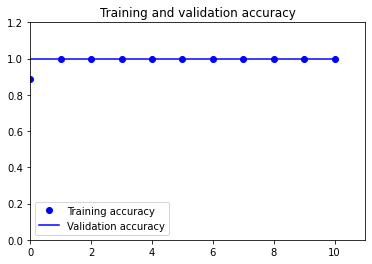

[-2.13716928  3.6160488   0.64174898 -6.05984578  2.62812281]


In [5]:
setosa_sign = [1., 0., 0.]
versicolor_sign = [0., 1., 0.]
virginica_sign = [0., 0., 1.]
verify_type_temp = setosa_sign #choose one of flower type to train the perceptron

verify_type = 0
for s in range(3): 
    if verify_type_temp[s] == 1: 
        verify_type = s
        break
train_accuracy_list = []
valid_accuracy_list = []
lr = 0.2
epoch = 300
# lr = 0.1       #if do not want to introduce learning rate and epoch,
# epoch = 1000     # we can set the lr and epoch equal 1
log_time = 10 
log_step = epoch/log_time
init_weight = np.random.uniform(-10,10,5)
weight = init_weight
for i in range(epoch):
  trainset_collect_classify_time = 0
  for j in range(len(train_inputs)):
      data_point = np.append(train_inputs[j],[1])
      #calclulate the classification
      if(train_outputs[j][verify_type] == 0):
          if((weight.dot(data_point)) > 0):
              weight = weight - lr * data_point
          else:
            trainset_collect_classify_time +=1
      elif(train_outputs[j][verify_type] == 1):
          if(weight.dot(data_point) < 0):
              weight = weight + lr * data_point
          else:
            trainset_collect_classify_time +=1
  train_accuracy = trainset_collect_classify_time/100
  validset_collect_classify_time = 0
  for j in range(len(val_input)):
      data_point = np.append(val_input[j],[1])
      if(val_output[j][verify_type] == 1):
        if(data_point.dot(weight) > 0):
          validset_collect_classify_time +=1
      elif(val_output[j][verify_type] == 0):
        if(data_point.dot(weight) < 0):
          validset_collect_classify_time +=1
  val_accuracy = validset_collect_classify_time/50
  if i % log_step == 0 or i == (epoch-1):
      print("epoch:[{}/{}]  train_accuracy:{}   valid accuracy:{}".format(i+1,epoch,train_accuracy,val_accuracy))
      train_accuracy_list.append(train_accuracy)
      valid_accuracy_list.append(val_accuracy)
show_results(train_accuracy_list,valid_accuracy_list,epoch)
print(weight)